# Page 1: code for regression and resulting model.

## CS498 - HW 6 - Aaron Blythe & Daniel Barker


In [139]:
boston <- data(Boston)
fit <- lm(medv~.,data=Boston)
summary(fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

# Page 2: a screenshot of your diagnostic plot and your explanation.
* When looking at the plot of the Residuals vs. Fitted, the top 5 outliers are 369, 372, 373, 365, and 370
* Those with the highest Cook's distance are 369, 373, 365, 366, and 370
* 381 has the highest leverage with .3 (30% of value is predicted from itself), 419 is also high with close to .2
* 366, 371, and 368 are all showing a large standard deviation from the mean

In [99]:
par(mfcol=c(2,4))
plot(fit, which=c(1:6), id.n = 6)
plot(rstandard(fit))
#influencePlot(fit)

# Page 3: a screenshot of your new diagnostic plot.

In [74]:
par(mfrow=c(3,3))
plot(new_fit, which = c(1:6))
influencePlot(new_fit)
plot(rstandard(new_fit))

StudRes   Hat        CookD     
162  3.761734 0.03740763 0.03823627
406 -1.440506 0.28589414 0.05920757
411  1.025555 0.19635070 0.01835308
413  4.710515 0.05690429 0.09160389
415  2.778508 0.10959622 0.06694078


# Page 4: a screenshot of your code for subproblem 2. 


In [73]:
remove_outlier <- Boston[-c(369, 372, 373, 365, 370, 366, 381, 419, 371, 368), ]
new_fit <- lm(medv~.,data=remove_outlier)
summary(new_fit)
# par(mfrow=c(3,3))
# plot(new_fit, which = c(1:6))
# influencePlot(new_fit)
# plot(rstandard(new_fit))


Call:
lm(formula = medv ~ ., data = remove_outlier)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7472  -2.2671  -0.5625   1.8065  17.2437 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.039841   4.489717   3.573 0.000389 ***
crim         -0.063929   0.036301  -1.761 0.078858 .  
zn            0.027139   0.011246   2.413 0.016185 *  
indus         0.029384   0.049982   0.588 0.556875    
chas          1.412927   0.738916   1.912 0.056448 .  
nox         -12.146714   3.131979  -3.878 0.000120 ***
rm            6.134296   0.387206  15.842  < 2e-16 ***
age          -0.032708   0.010965  -2.983 0.002999 ** 
dis          -1.157693   0.163752  -7.070 5.48e-12 ***
rad           0.173085   0.055787   3.103 0.002031 ** 
tax          -0.012445   0.003060  -4.067 5.56e-05 ***
ptratio      -0.909254   0.106855  -8.509 2.23e-16 ***
black         0.010850   0.002234   4.857 1.61e-06 ***
lstat        -0.249996   0.045738  -5.466 7.40e-08 ***
---

###### NOTE: the improvement from Adjusted R-sqared on this page is 0.8096 a decent improvement over  page 1 with an Adjusted R-sqared of 0.7338

# Page 5: Screenshot of Box-Cox transformation plot and best value chosen


In [62]:
box_cox <- boxcox(medv~., data = remove_outlier, plotit = FALSE)
best_lambda <- box_cox$x[which.max(box_cox$y)]
boxcox2 <- powerTransform(new_fit)
cat("Best value for lambda (manual calculation)", best_lambda, "Best value for lambda (From PowerTransform)", boxcox2$roundlam)
box_cox <- boxcox(medv~., data = remove_outlier)
title("Plot of Box-Cox");

Best value for lambda (manual calculation) 0.3 Best value for lambda (From PowerTransform) 0.33

\pagebreak

# Page 6: Result of the standardized residuals of the regression after Box-Cox transformation and a plot of fitted house price against true house price.

In [51]:
par(mfrow=c(2,1))
#1) you can plot Standardized Residuals against the Fitted values, just like page 226
#https://stats.stackexchange.com/questions/82682/how-do-i-interpret-this-fitted-vs-residuals-plot
plot(fitted(new_fit), residuals(new_fit), main="Residual vs Fit. value", xlab="Fitted", ylab="Residuals")
new_model = ((fitted.values(new_fit) * best_lambda) + 1)^1/best_lambda
#2) you can plot something like fig 11.18 on page 228
plot(new_model ~ remove_outlier$medv, main="Predicted vs. True Median House Prices",
  xlab="Predicted median prices (x US$1,000)", ylab="True median prices (x US$1,000)")

\pagebreak

# Page 7: code for subproblems 3 and 4.

In [69]:
box_cox <- boxcox(medv~., data = remove_outlier, plotit = FALSE)

best_lambda <- box_cox$x[which.max(box_cox$y)]
"Best value for lambda"
best_lambda

#box_cox <- boxcox(medv~., data = remove_outlier)
#title("Plot of Box-Cox");

par(mfrow=c(2,2))
#1) you can plot Standardized Residuals against the Fitted values, just like page 226
#https://stats.stackexchange.com/questions/82682/how-do-i-interpret-this-fitted-vs-residuals-plot
plot(fitted(new_fit), residuals(new_fit), main="Residual vs Fit. value", xlab="Fitted", ylab="Residuals")
new_model = ((fitted.values(new_fit) * best_lambda) + 1)^1/best_lambda
summary(new_model)

#2) you can plot something like fig 11.18 on page 228
#plot(new_model ~ remove_outlier$medv, main="Predicted vs. True Median House Prices",
#  xlab="Predicted median prices (x US$1,000)", ylab="True median prices (x US$1,000)")

[1] "Best value for lambda"

[1] 0.3

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3051 20.3500 24.7501 25.6315 30.4795 49.3083 

In [1]:
# Start here:
# below is where most of the work for this assignment was figured out by trying a bunch of different things.
# It remains purely to refer back to, not for grading necessarily.


install.packages("RCurl")
require(RCurl)
install.packages("MASS",repos="http://lib.stat.cmu.edu/R/CRAN")
require(MASS)
install.packages("car")
library(car)
#library(data.table)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘bitops’

Loading required package: RCurl
Loading required package: bitops
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Loading required package: MASS
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’

Loading required package: carData


In [2]:
# Assignment: https://courses.engr.illinois.edu/cs498aml/sp2019/homeworks/homework6.html
# Reference: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
#housing <- read.csv(textConnection(getURL("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")), header = FALSE, sep = '', strip.white = TRUE)
#colnames(housing) <- c("CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO", "B", "LSTAT", "MEDV")
data(Boston)
head(Boston)
class(Boston)

# 1) you can plot Standardized Residuals against the Fitted values, just like page 226
# 2) you can plot something like fig 11.18 on page 228

crim    zn indus chas nox   rm    age  dis    rad tax ptratio black  lstat
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    396.90 4.98 
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    396.90 9.14 
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    392.83 4.03 
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    394.63 2.94 
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    396.90 5.33 
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    394.12 5.21 
  medv
1 24.0
2 21.6
3 34.7
4 33.4
5 36.2
6 28.7

[1] "data.frame"

In [3]:
# Regress house price (variable 14) against all others
fit <- lm(medv~.,data=Boston)
class(fit)
summary(fit)

outlierTest(fit, cutoff=0.3)

[1] "lm"


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

     rstudent unadjusted p-value Bonferonni p
369  5.907411         6.4998e-09   3.2889e-06
372  5.491079         6.4185e-08   3.2478e-05
373  5.322247         1.5617e-07   7.9020e-05
370  3.807609         1.5808e-04   7.9987e-02
413  3.546859         4.2724e-04   2.1618e-01
365 -3.457995         5.9153e-04   2.9932e-01

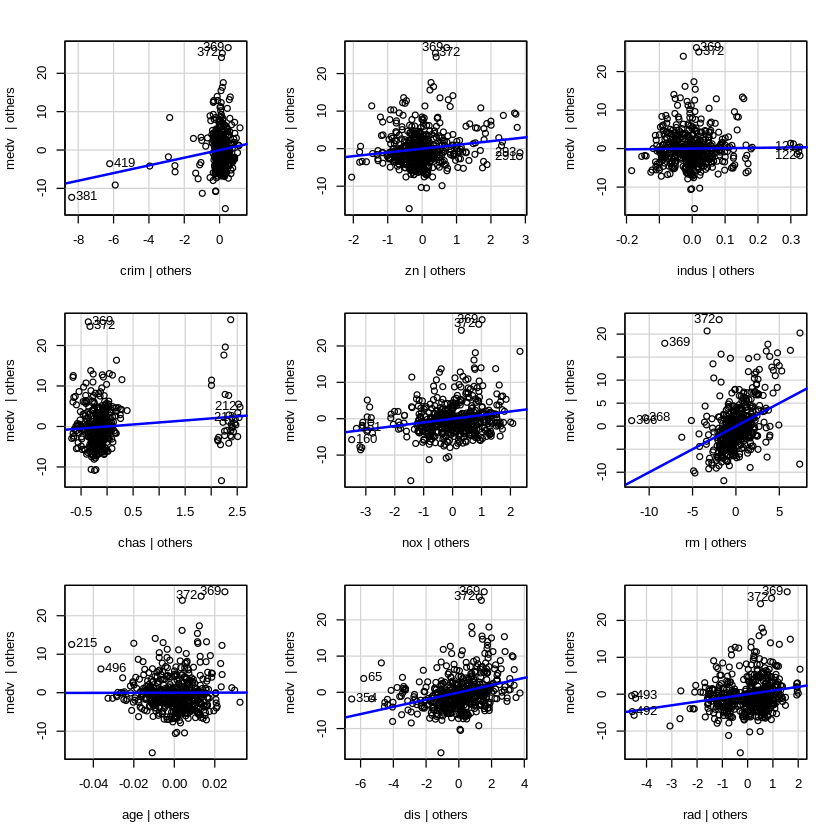

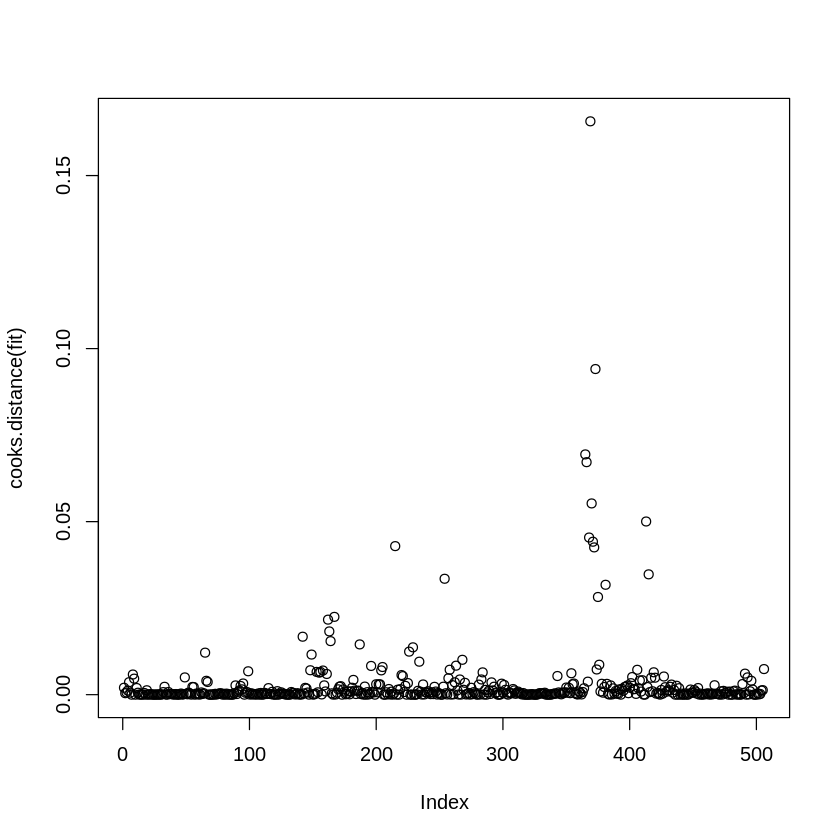

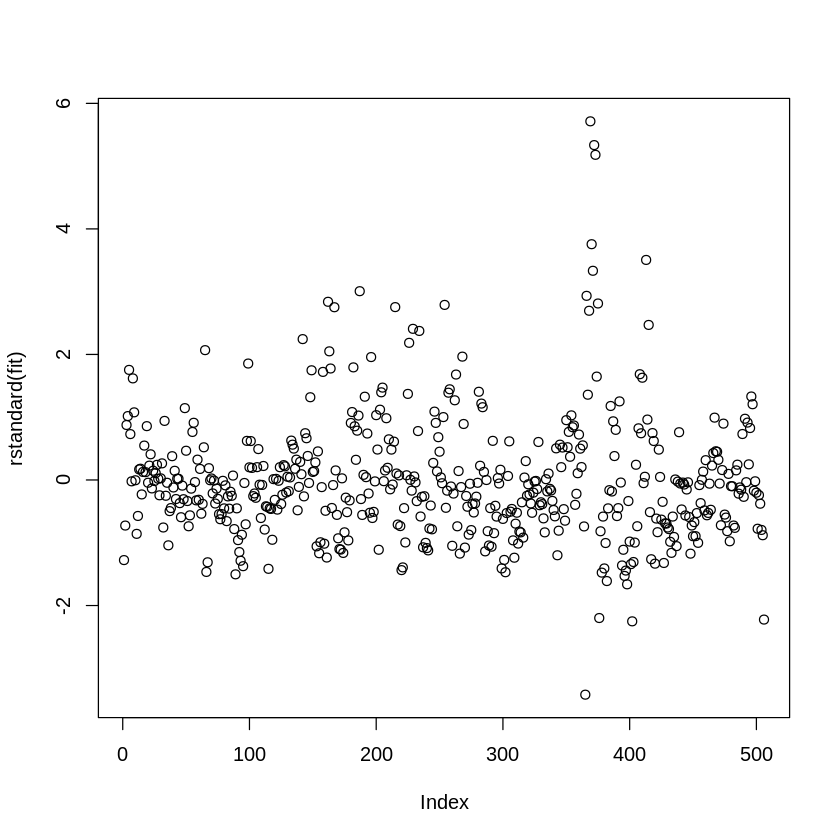

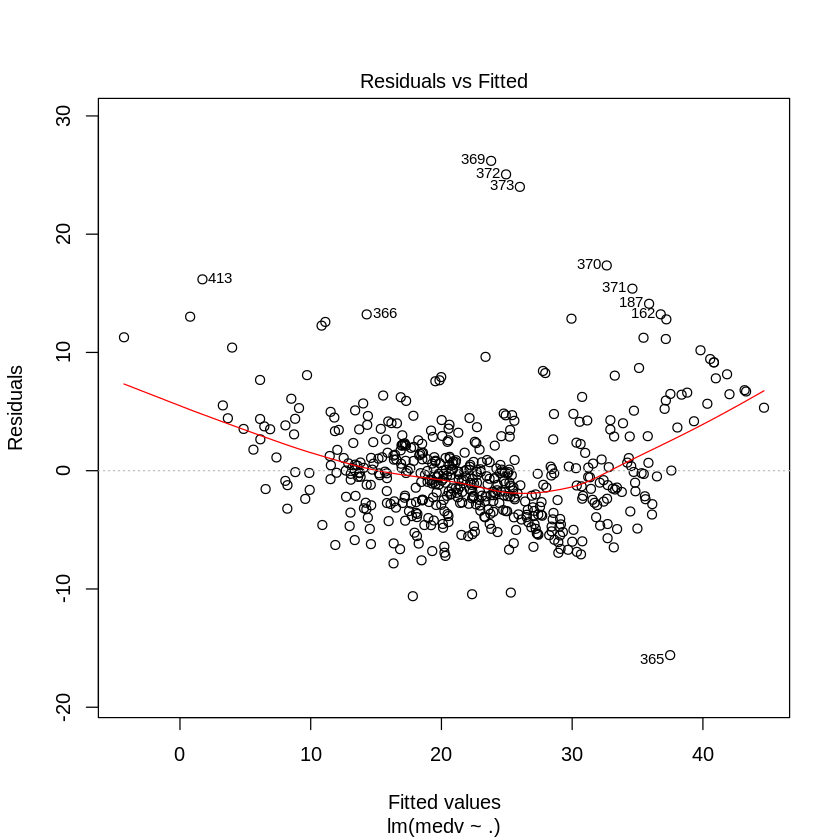

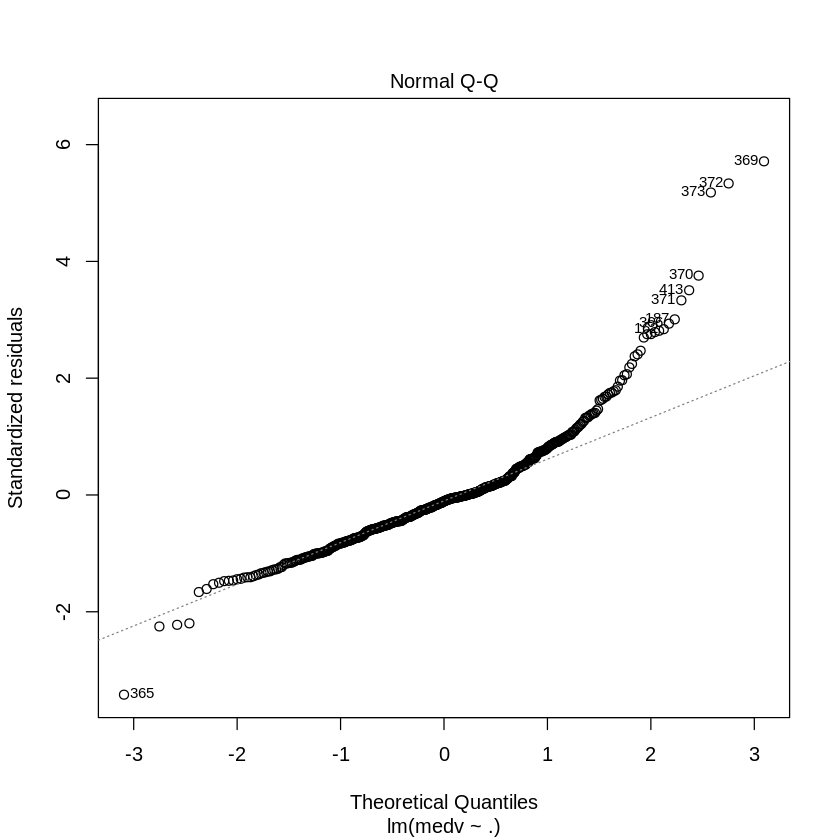

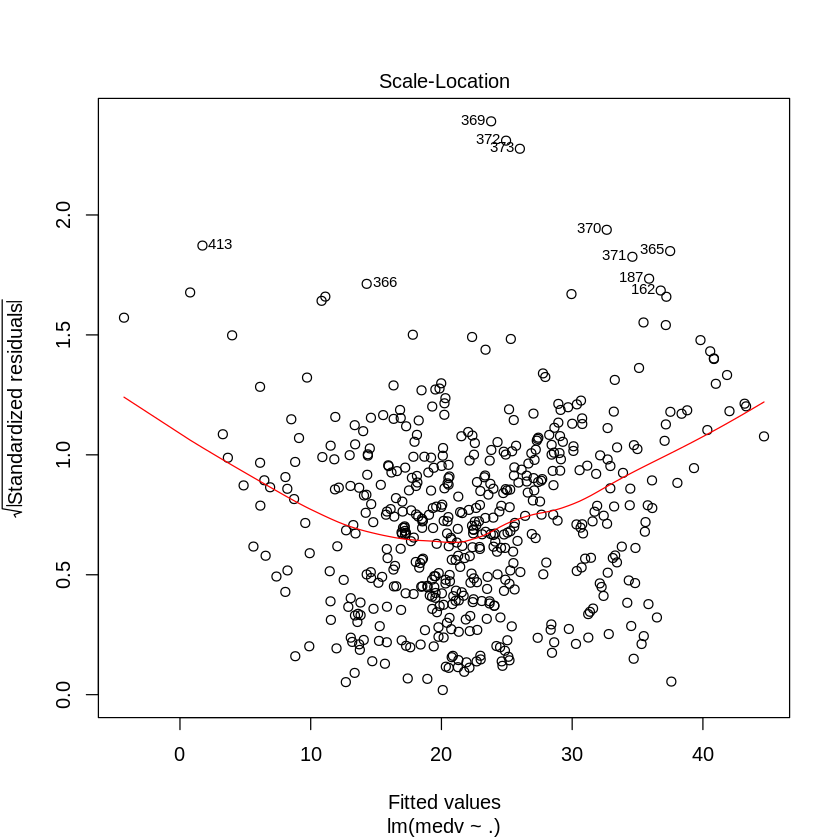

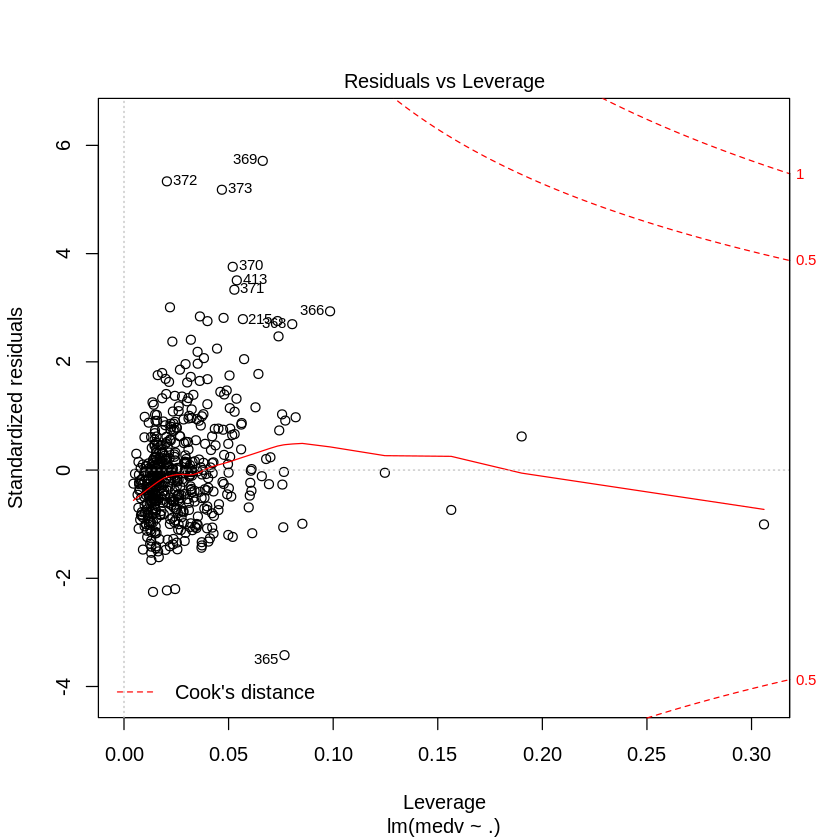

In [4]:

#par(mfrow=c(2,2)) # Change the panel layout to 2 x 2

# and use leverage
leveragePlots(fit)

# Cook's distance
plot(cooks.distance(fit))
#text(fit, labels=rownames(cars), data=fit, cex=0.9)

# and standardized residuals to find possible outliers.
plot(rstandard(fit))

plot(fit, id.n = 10)
#par(mfrow=c(1,1)) # Change back to 1 x 1
#plot(fit)

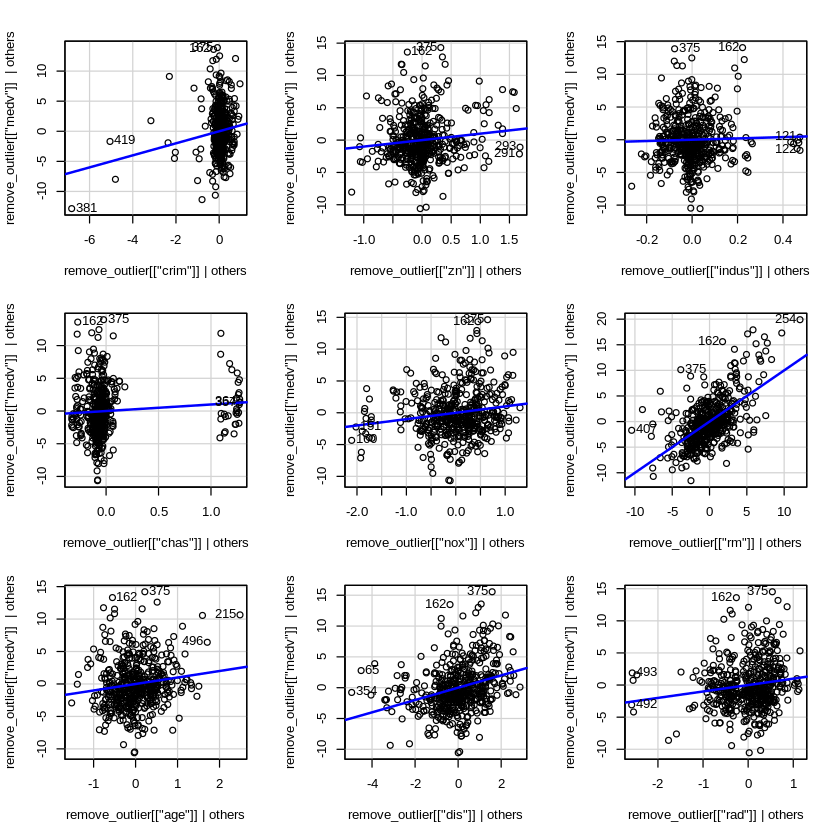

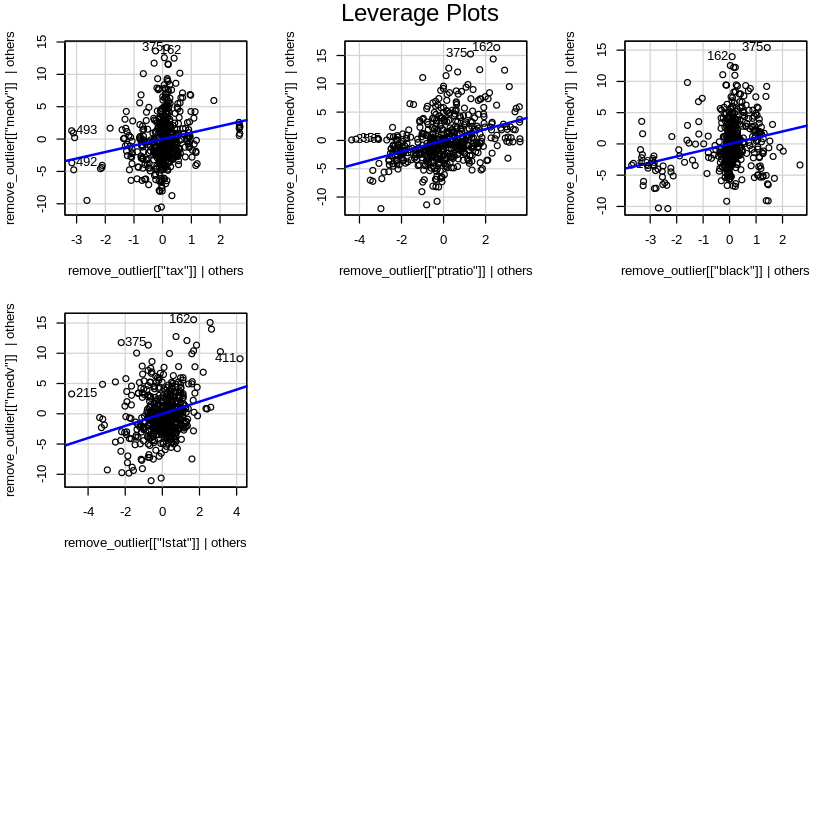

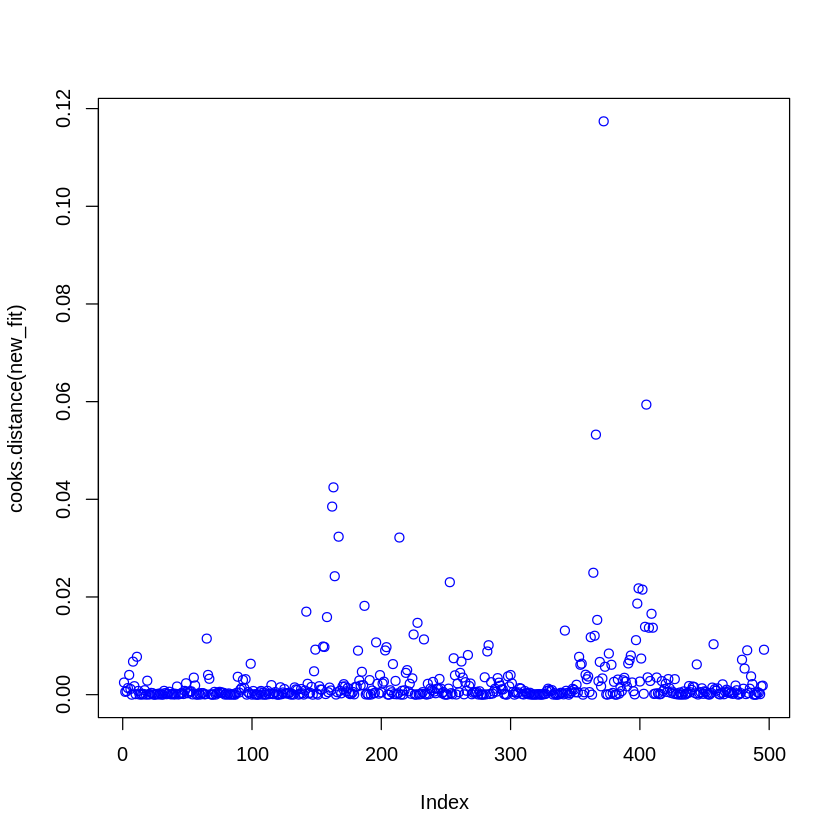

StudRes    Hat        CookD     
162  3.7909099 0.03712652 0.03851149
375  3.8498488 0.04919108 0.05324444
381 -1.9245911 0.30853080 0.11739375
415  3.1757389 0.07748904 0.05939097
419  0.9886843 0.19172612 0.01656267

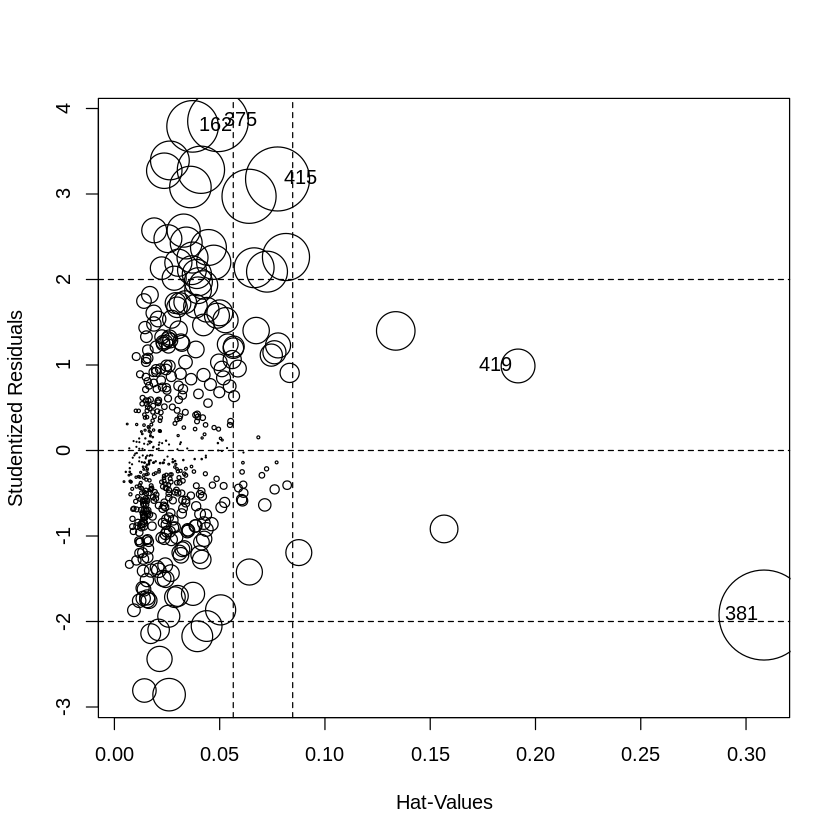

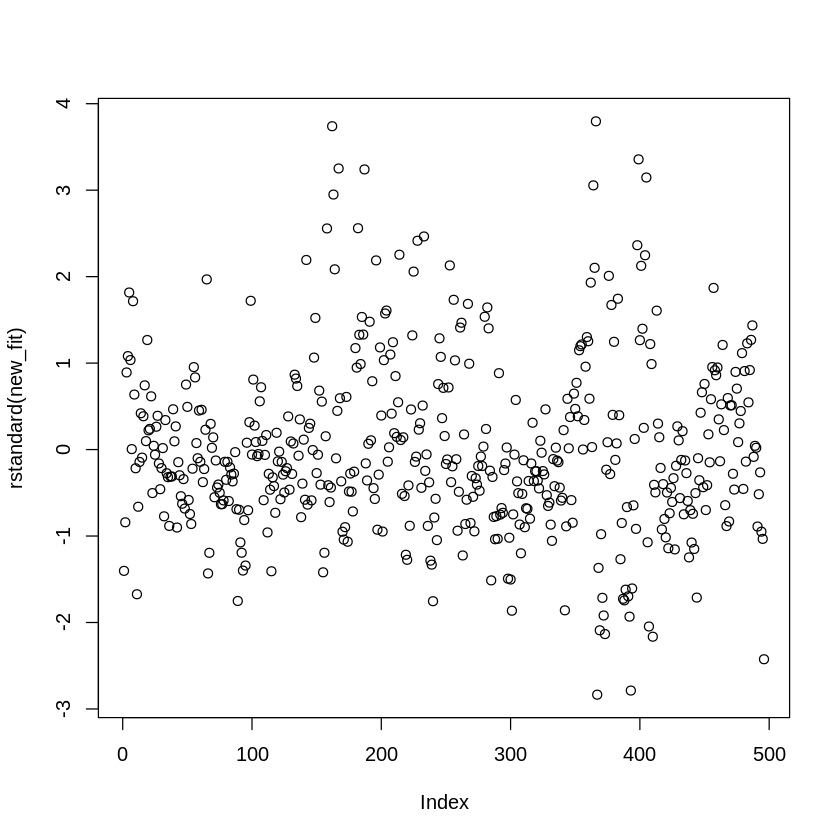

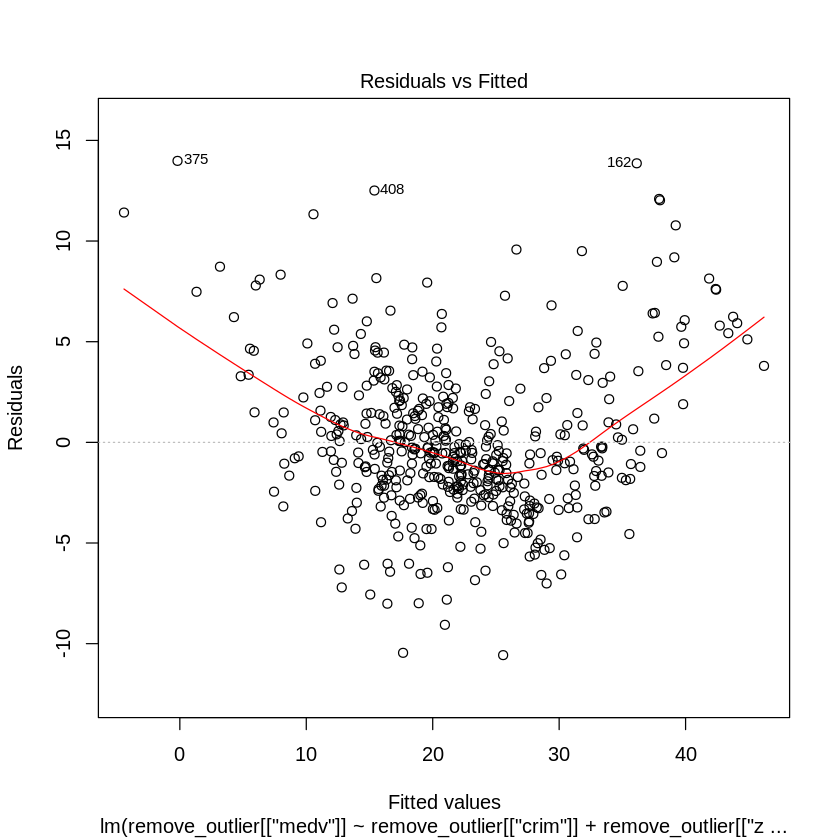

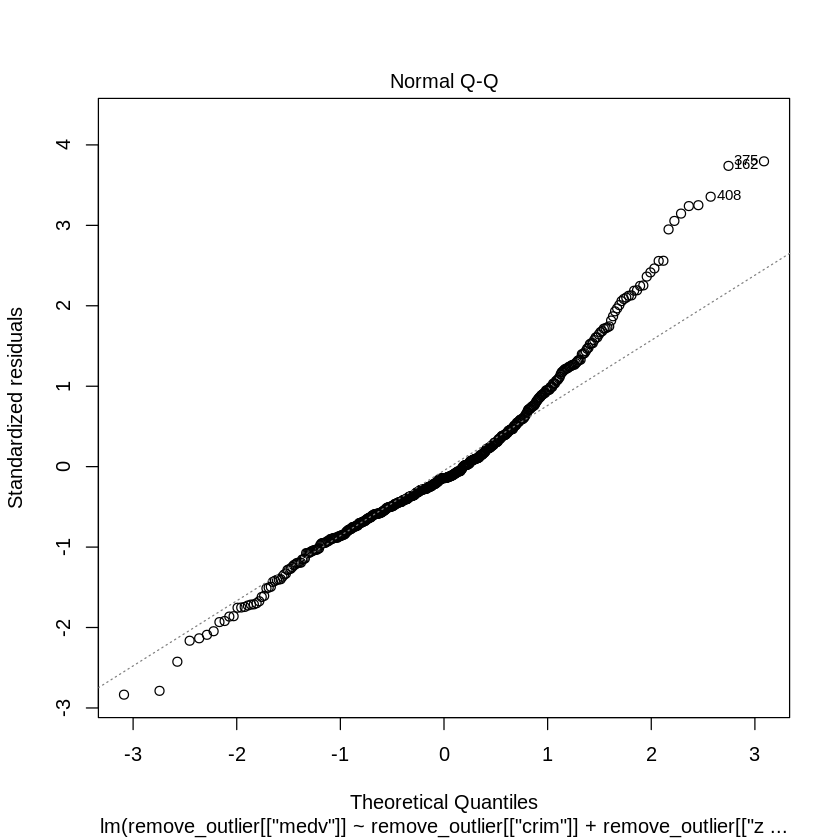

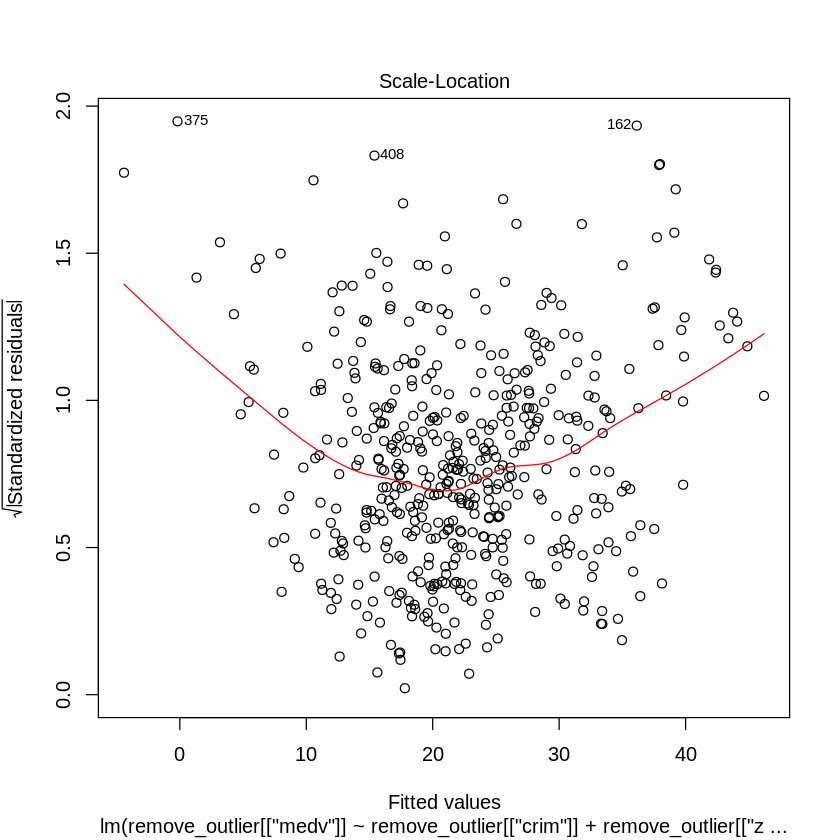

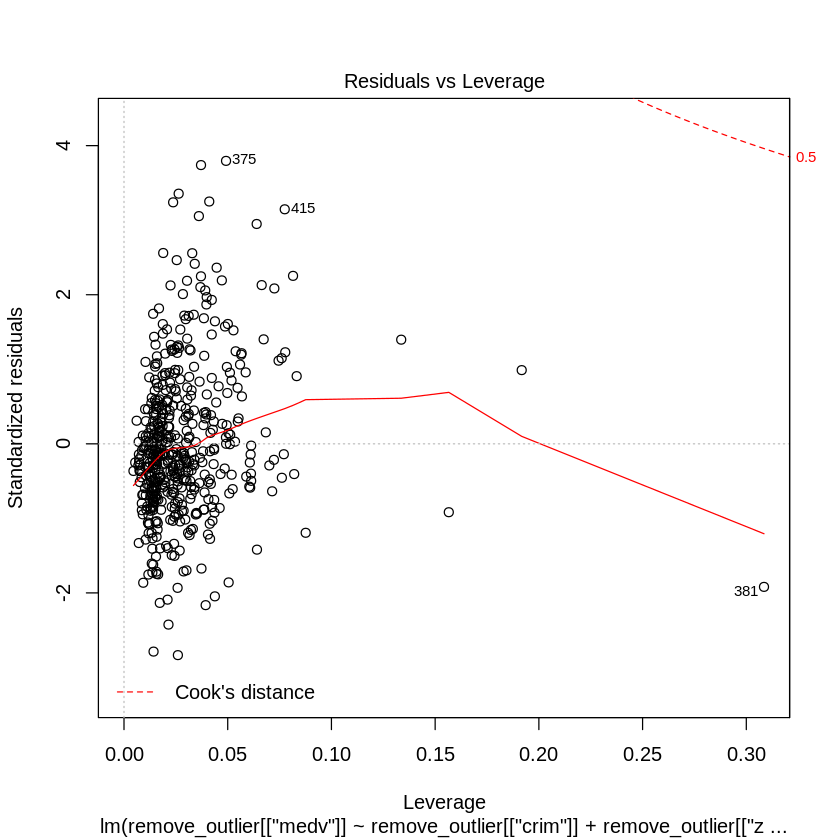

In [5]:
# https://stackoverflow.com/questions/29948749/removing-multiple-outliers-in-regression-model-in-r
# lm(housing[c(-361, -367, -369),14] ~ housing[c(-361, -367, -369),1]

# x1 <- x[-c(4, 8), ]
remove_outlier <- Boston[-c(369, 372, 373, 370, 371, 197, 368, 366, 365, 413), ]

new_fit <- lm(remove_outlier[["medv"]] 
          ~ remove_outlier[["crim"]]
          + remove_outlier[["zn"]] 
          + remove_outlier[["indus"]] 
          + remove_outlier[["chas"]] 
          + remove_outlier[["nox"]] 
          + remove_outlier[["rm"]] 
          + remove_outlier[["age"]] 
          + remove_outlier[["dis"]] 
          + remove_outlier[["rad"]] 
          + remove_outlier[["tax"]] 
          + remove_outlier[["ptratio"]] 
          + remove_outlier[["black"]] 
          + remove_outlier[["lstat"]], 
          data = remove_outlier)

# and use leverage
leveragePlots(new_fit)

# Cook's distance
#?cooks.distance
plot(cooks.distance(new_fit), col = "blue")
#text(new_fit, labels=rownames(new_fit), data=new_fit, cex=0.7)
influencePlot(new_fit)

# and standardized residuals to find possible outliers.
plot(rstandard(new_fit))

plot(new_fit)
#par(mfrow=c(1,1)) # Change back to 1 x 1
#plot(new_fit)

Y1 
0.33

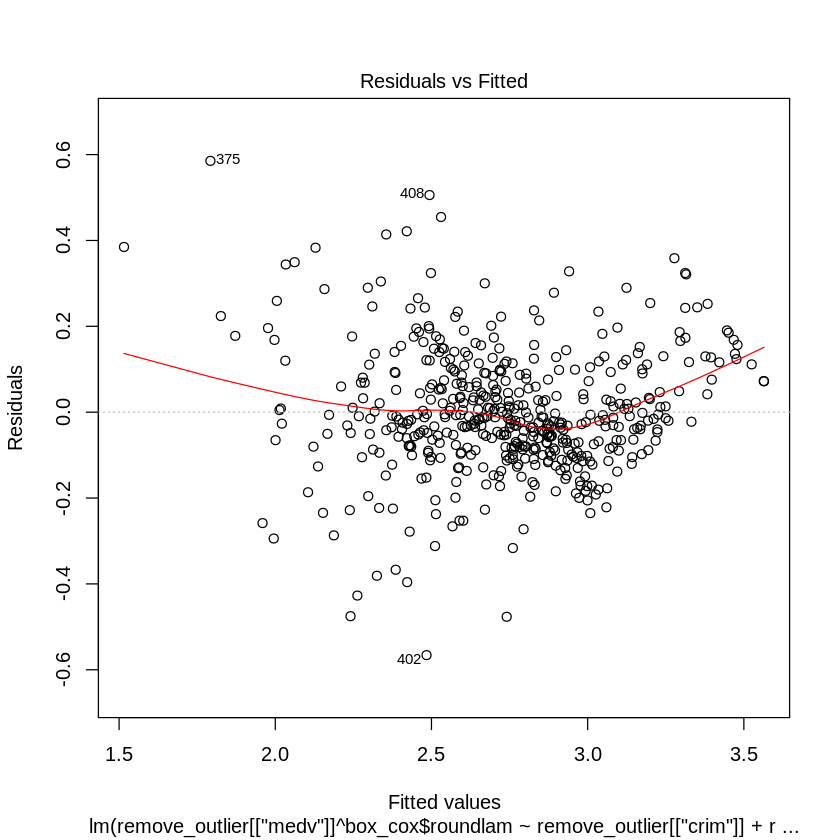

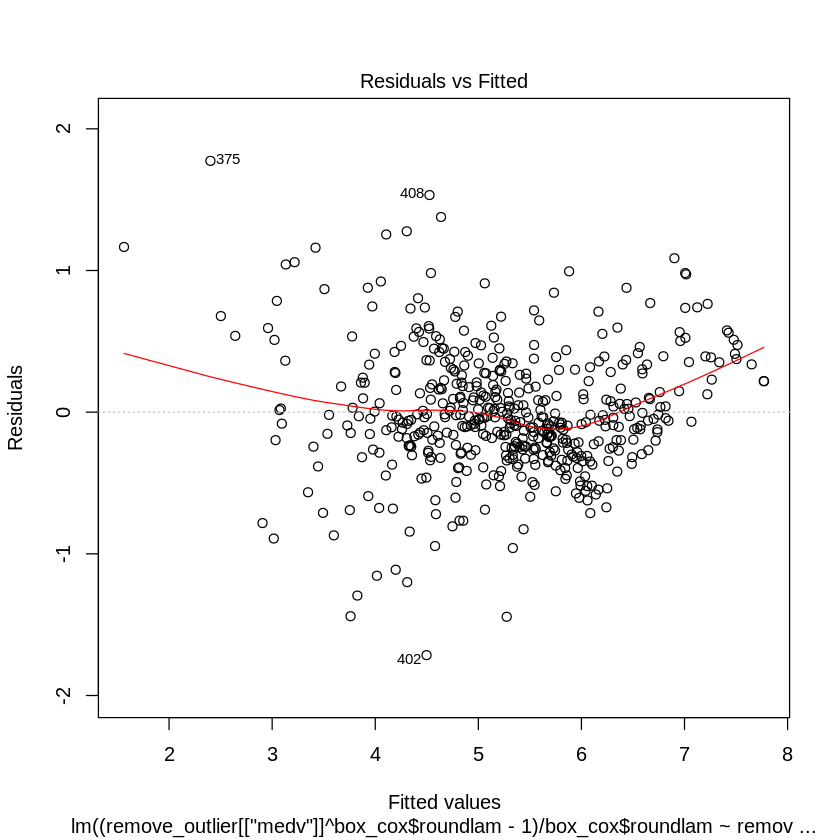

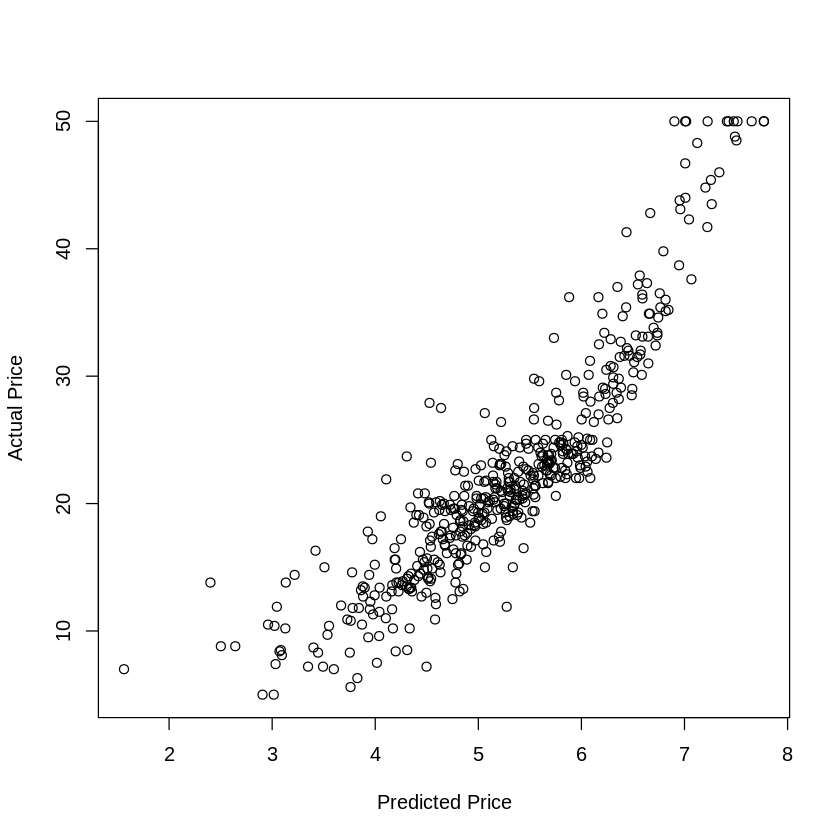

In [6]:
#box_cox <- boxcox(new_fit, 
#          data = remove_outlier, lambda = seq(-2, 2))

#range(box_cox$x[box_cox$y > max(box_cox$y)-qchisq(0.95,1)/2])

box_cox <- powerTransform(new_fit)

box_cox$roundlam

box_cox_fit <- lm(remove_outlier[["medv"]]^box_cox$roundlam 
          ~ remove_outlier[["crim"]]
          + remove_outlier[["zn"]] 
          + remove_outlier[["indus"]] 
          + remove_outlier[["chas"]] 
          + remove_outlier[["nox"]] 
          + remove_outlier[["rm"]] 
          + remove_outlier[["age"]] 
          + remove_outlier[["dis"]] 
          + remove_outlier[["rad"]] 
          + remove_outlier[["tax"]] 
          + remove_outlier[["ptratio"]] 
          + remove_outlier[["black"]] 
          + remove_outlier[["lstat"]], 
          data = remove_outlier)
          
plot(box_cox_fit, which = c(1))

t <- lm((remove_outlier[["medv"]]^box_cox$roundlam -1)/box_cox$roundlam
          ~ remove_outlier[["crim"]]
          + remove_outlier[["zn"]] 
          + remove_outlier[["indus"]] 
          + remove_outlier[["chas"]] 
          + remove_outlier[["nox"]] 
          + remove_outlier[["rm"]] 
          + remove_outlier[["age"]] 
          + remove_outlier[["dis"]] 
          + remove_outlier[["rad"]] 
          + remove_outlier[["tax"]] 
          + remove_outlier[["ptratio"]] 
          + remove_outlier[["black"]] 
          + remove_outlier[["lstat"]], 
          data = remove_outlier)
plot(t, which = c(1))
pred <- predict(t)
plot(pred,remove_outlier[["medv"]], xlab = "Predicted Price", ylab = "Actual Price")